## DL Part 2-1. DNN : Deep Neural Network

## 0.SLP - random data, tensorflow

(50,) (50,)
2638.633
134.25279
132.09166
132.08981
132.0898


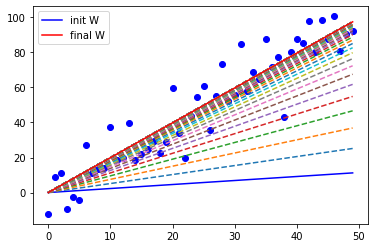

In [7]:
# random data 

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

m = 50
# 데이터 준비
X = tf.constant(range(m), tf.float32)
y = X*2 + tf.random.normal((50,)) * 10

print(X.shape, y.shape)
plt.plot(X, y, 'bo')

# 학습 과정 - 1. W 값 초기화
W = tf.Variable(tf.random.normal(()))
plt.plot(X, W*X, 'b', label='init W')

# 2. lr 값 설정 (hyper-parameter)
lr = 0.0001  # learning rate

# 3. 학습 횟수 설정 (Epoch = 100)
for i in range(100):
    # 4. 자동 미분을 위한 객체 생성
    with tf.GradientTape() as tape:
        h = W * X   # 5. 출력 값 구하기
        cost = tf.keras.losses.MSE(y, h)  # 6. loss function - 오차값 구하기
    dw = tape.gradient(cost, W)  # 7. cost, W를 사용하여 미분 값 구하기
    W.assign(W - lr*dw)  # 8. 미분값과 learning rate의 곱을 사용하여 W 값 갱신 
    plt.plot(X, W*X, '--')   
    
    if not i % 20 :
        print(cost.numpy())
        #print(f'{i}, cost:{cost.numpy():.3f}, W:{W.numpy():.3f}')

plt.plot(X, W*X, 'r-', label='final W')
plt.legend()

## 1.상수 값으로 풀어보는 XOR  예제

![xor_nn_1](https://user-images.githubusercontent.com/661959/54298177-9e82f080-45fb-11e9-8bdd-1f86718c6f5d.png)

* 행렬식으로 간소화
  * $\displaystyle \begin{bmatrix}L_1 & L_2 \end{bmatrix} =  sig(\begin{bmatrix} x_1 & x_2 \end{bmatrix} \cdot   \begin{bmatrix} 5 & -7 \\ 5 & -7\end{bmatrix} +     \begin{bmatrix} -8 & 3\end{bmatrix})$
  * $\displaystyle output = sig(\begin{bmatrix} L_1 & L_2 \end{bmatrix} \cdot \begin{bmatrix} -11 \\ -11 \end{bmatrix} + \begin{bmatrix} 6 \end{bmatrix}) $



In [ ]:
#!pip install tensorflow

In [ ]:
# 이건 MLP 학습 결과
w1: [[ 6.0491767,6.1225863], [-5.760253, -6.277827]]
b1: [ 2.8576005, -3.3210485]
w2: [[-9.3568], [ 9.868228]]
b2: [4.337875]

In [ ]:
import tensorflow as tf
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

# 1번째 층 변수 생성
W1 = tf.Variable(np.array([[5, -7], [5, -7]], dtype=np.float32), name='W1')
b1 = tf.Variable(np.array([-8, 3], dtype=np.float32), name='b1')
# 1번째 층 연산
L1 = tf.sigmoid(tf.matmul(X, W1) + b1)
# 2번째 층 변수 생성
W2 = tf.Variable(np.array([[-11], [-11]], dtype=np.float32), name='W2')
b2 = tf.Variable(np.array([6], dtype=np.float32), name='b2')
# 2번째 층 연산
hypothesis = tf.sigmoid(tf.matmul(L1, W2) + b2)

pred = tf.cast(hypothesis > 0.5, dtype=tf.int32)
acc = np.mean(pred == y)

print(f"\nHypothesis:\n{hypothesis} \nPredicted:\n{pred} \nAccuracy:\n{acc}")


Hypothesis:
[[0.01118419]
 [0.9949357 ]
 [0.9949357 ]
 [0.02438849]] 
Predicted:
[[0]
 [1]
 [1]
 [0]] 
Accuracy:
1.0


## 2.Backpropagation
*  딥러닝 불가론 : Perceptron(1969) by Marvin Minsky(마빈 민스키), MIT AI Lab
    
     ![image.png](https://i.imgur.com/w3R847C.png)
    > "No one on earth had found a viable way to train MLPs"
    ("지구에서는 아무도 MLP를 훈련할 실행 가능한 방법을 찾지 못했다".)

* 역 전파 알고리즘 등장
    * 1974, 1982 by Paul Werbos
    * 1986 Jeffry Hinton, 재발견
* 출력층의 결과 오차를 입력층 까지 거슬러 전파하면서 계산

### 2-01. Backpropagation - Feed Forward
![](https://i.imgur.com/VteL102.png)
* $z_1, z_2 $
  * $z_1 = w_1x_1 + w_2x_2 = 0.3\times0.1 + 0.25\times0.2 = 0.08$
  * $z_2 = w_3x_1 + w_4x_2 = 0.4\times0.1 + 0.35\times0.2 = 0.11$
* $h_1, h_2$
  * $h_1 = sig(z_1) = 0.5199893$
  * $h_2 = sig(z_2) = 0.5274723$
* $z_3, z_4$
  * $z_3 = w_5h_1 + w_6h_2 = 0.45\times h1 + 0.4 \times h_2 = 0.4449841$
  * $z_4 = w_7h_1 + w_8h_2 = 0.7\times h1 + 0.6 \times h2 = 0.68047595$
* $o_1, o_2$
  * $o_1 = sig(z_3) = 0.609446$
  * $o_2 = sig(z_4) = 0.66384494$
* cost
  * $ cost_1 = \frac{1}{2}(y_1 - o_1)^2 = 0.02193381 $
  * $ cost_2 = \frac{1}{2}(y_2 - o_2)^2 = 0.0020380868 $
  * $ cost_{tot} = cost_1 + cost_2  = 0.023971897$


In [ ]:
import tensorflow as tf
x1, x2 = 0.1, 0.2
w1, w2, w3, w4, w5, w6, w7, w8 = 0.3, 0.25, 0.4, 0.35, 0.45, 0.4, 0.7, 0.6
y1, y2 = 0.4, 0.6
h1 = tf.sigmoid(w1*x1+w2*x2)
h2 = tf.sigmoid(w3*x1+w4*x2)

z3 = w5*h1+w6*h2
z4 = w7*h1 + w8*h2
print(f'z3:{z3}, z4:{z4}')
o1 = tf.sigmoid(z3)
o2 = tf.sigmoid(z4)
print(f'o1:{o1}, o2:{o2}')
c1 = 1/2*(y1 - o1)**2
c2 = 1/2*(y2 - o2)**2
cost = c1 + c2
print(f'c1:{c1}, c2:{c2}, cost:{cost}')

z3:0.44498410820961, z4:0.6804759502410889
o1:0.6094459891319275, o2:0.6638449430465698
c1:0.02193381078541279, c2:0.0020380867645144463, cost:0.02397189661860466


### 2-02. Backpropagation step-1

![](https://i.imgur.com/dI0T2B7.png)

* $w_5, w_6,w_7,w_8$의 미분값 계산

  * $\displaystyle \frac{\partial Cost_{tot}}{\partial w_5} = \frac{\partial Cost_{tot}}{\partial o_1} \times \frac{\partial o_1}{\partial z_3} \times \frac{\partial z_3}{\partial w_5}$
    * $ \begin{align}
    \frac{\partial Cost_{tot}}{\partial o_1} &= \frac{\partial Cost_1}{\partial o1} + \require{cancel} \cancelto{0}{\frac{\partial Cost_2}{\partial o1}} \\
    &= 2 \frac{1}{2}(y_1 - o_1)^{2-1} -1 + 0 \\
    &= -(y_1 - o_1) \\
    &=  -(0.4 - 0.609446) = 0.20944598
    \end{align}$
    * $\displaystyle \frac{\partial o_1}{\partial z_3} = o_1(1-o_1) = 0.609446(1 - 0.609446) = 0.23802158$
      * $sigmoid$ 함수의 미분 :  https://en.wikipedia.org/wiki/Logistic_function#Derivative
      * $\displaystyle \frac{\mathrm d }{\mathrm d x}f(x) = f(x)(1- f(x))$
    * $\displaystyle \frac{\partial z_3}{\partial w_5} = \frac{\partial }{\partial w_5}({w_5h_1 + w_6h_2}) = h_1 = 0.5199893$
    * $\displaystyle \frac{\partial Cost_{tot}}{\partial w_5} =  0.20944598 \times 0.23802158 \times 0.5199893 = 0.025922852$

  * $\displaystyle \frac{\partial Cost_{tot}}{\partial w_6} = 0.026295898 $
  * $\displaystyle \frac{\partial Cost_{tot}}{\partial w_7} = 0.0074084452$
  * $\displaystyle \frac{\partial Cost_{tot}}{\partial w_8} = 0.007515058$
* 각 Weight 업데이트($\alpha = 0.5$로 가정)
  * $w_5^+ =w_5 - \alpha\frac{\partial Cost_{tot}}{\partial w_5} = 0.45 - 0.5 \times 0.025922852 = 0.43703857 $
  * $w_6^+ =w_6 - \alpha\frac{\partial Cost_{tot}}{\partial w_6} = 0.4 - 0.5 \times 0.026295898 = 0.38685206 $
  * $w_7^+ =w_7 - \alpha\frac{\partial Cost_{tot}}{\partial w_7} = 0.7 - 0.5 \times 0.0074084452 = 0.69629574 $
  * $w_8^+ =w_8 - \alpha\frac{\partial Cost_{tot}}{\partial w_8} = 0.6 - 0.5 \times 0.007515058 = 0.5962425 $



In [ ]:
dw5 = -(y1-o1) * o1*(1-o1) * h1
dw6 = -(y1-o1) * o1*(1-o1) * h2
dw7 = -(y2-o2) * o2*(1-o2) * h1
dw8 = -(y2-o2) * o2*(1-o2) * h2
print(f'dw5:{dw5}, dw6:{dw6}, dw7:{dw7}, dw8:{dw8}')

lr = 0.5
w5_ = w5 - dw5 * lr
w6_ = w6 - dw6 * lr
w7_ = w7 - dw7 * lr
w8_ = w8 - dw8 * lr
print(f'w5+:{w5_}, w6+:{w6_}, w7+:{w7_}, w8+:{w8_}')


### 2-03. Backpropagation step-2

![](https://i.imgur.com/tukVuAB.png)

* $w_1, w_2, w_3, w_4$의 미분값 계산
  * $\displaystyle \frac{\partial Cost_{tot}}{\partial w_1} = \frac{\partial Cost_{tot}}{\partial h_1} \times \frac{\partial h_1}{\partial z_1} \times \frac{\partial z_1}{\partial w_1}$
    * $\displaystyle \frac{\partial Cost_{tot}}{\partial h_1} = \frac{\partial Cost_1}{\partial h_1}  +  \frac{\partial Cost_2}{\partial h_2} $
        * $\begin{align}\displaystyle \frac{\partial Cost_1}{\partial h_1} &= \frac{\partial Cost_1}{\partial o_1}  \times  \frac{\partial o_1}{\partial z_3} \times \frac{\partial z_3}{\partial h1} \\
         &= -(y_1 - o_1) o_1(1-o_1)w_5 \\
          &= 0.022433696
         \end{align}$
        * $\begin{align}
        \displaystyle \frac{\partial Cost_2}{\partial h_1} &= \frac{\partial Cost_2}{\partial o_2}  \times  \frac{\partial o_2}{\partial z_4} \times \frac{\partial z_4}{\partial h1} \\
        & = -(y_2-o_2)o_2(1-o_2)w_7 \\
        & = 0.009973112
        \end{align} $
    * $\displaystyle \frac{\partial Cost_{tot}}{\partial h_1} = 0.032406807 $
    * $\displaystyle \frac{\partial h_1}{\partial z_1} = h_1(1-h_1) = 0.24960042536258698$
    * $\displaystyle \frac{\partial z_1}{\partial w_1} = x_1 = 0.1$
  * $\displaystyle \frac{\partial Cost_{tot}}{\partial w_1} = 0.032406807 \times 0.24960042536258698 \times 0.1  = 0.000808875251095742 $
  * $\displaystyle \frac{\partial Cost_{tot}}{\partial w_2} = 0.001617750502191484 $
  * $\displaystyle \frac{\partial Cost_{tot}}{\partial w_3} = 0.0007100860239006579 $
  * $\displaystyle \frac{\partial Cost_{tot}}{\partial w_4} = 0.0014201720478013158 $

* $w1, w2, w3, w4$ 업데이트
  * $w_1^+ = w_1- \alpha \frac{\partial Cost_{tot}}{\partial w_1} = 0.3 - 0.5\times 0.000808875251095742 = 0.29959556460380554$
  * $w_2^+ = w_2- \alpha \frac{\partial Cost_{tot}}{\partial w_2} = 0.25 - 0.5\times 0.001617750502191484 = 0.24919112026691437$
  * $w_3^+ = w_1- \alpha \frac{\partial Cost_{tot}}{\partial w_3} = 0.4 - 0.5\times 0.0007100860239006579 = 0.39964497089385986$
  * $w_4^+ = w_1- \alpha \frac{\partial Cost_{tot}}{\partial w_4} = 0.35 - 0.5\times 0.0014201720478013158 = 0.3492898941040039$

In [ ]:
dcost_h1_1 = -(y1 - o1) * o1*(1-o1)*w5
dcost_h1_2 = -(y2 - o2) * o2*(1-o2)*w7
dcost_h1 = dcost_h1_1 + dcost_h1_2
print(f'dcost1:{dcost_h1_1}, dcost_2:{dcost_h1_2}, dcost:{dcost_h1}')

dcost_h2_1 = -(y1 - o1) *  o1*(1-o1)*w6
dcost_h2_2 = -(y2-o2)*o2*(1-o2)*w8
dcost_h2 = dcost_h2_1 + dcost_h2_2

dh1 = h1 * (1-h1)
dh2 = h2 * (1-h2)
print(f'dh1:{dh1}')
dw1 = dcost_h1 * dh1 * x1
dw2 = dcost_h1 * dh1 * x2
dw3 = dcost_h2 * dh2 * x1
dw4 = dcost_h2 * dh2 * x2
print(f'dw1:{dw1}, dw2:{dw2}, dw3:{dw3}, dw4:{dw4}')

w1_ = w1 - lr * dw1
w2_ = w2 - lr * dw2
w3_ = w3 - lr * dw3
w4_ = w4 - lr * dw4
print(f'w1+:{w1_}, w2+:{w2_}, w3+:{w3_}, w4+:{w4_}')

In [ ]:
h1_ = tf.sigmoid(w1_ * x1 + w2_ * x2)
h2_ = tf.sigmoid(w3_ * x1 + w4_ * x2)
o1_ = tf.sigmoid(w5_ * h1_ + w6_ * h2_)
o2_ = tf.sigmoid(w7_ * h1_ + w8_ * h2_)
cost_ = 1/2*(y1 - o1_)**2  +  1/2*(y2 - o2_)**2
print(f'updated cost:{cost_} improved:{cost-cost_}')

## 3.XOR 문제 MLP 학습

### 3-01. Tensorflow로 구현
- 앞서 상수로 풀었던 XOR 문제를 MLP 학습으로 해결

In [ ]:
import tensorflow as tf
import numpy as np
# random seed 설정
tf.random.set_seed(777)
np.random.seed(0)

# 변수 설정
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

# 1번째 층 변수 생성
W1 = tf.Variable(tf.random.normal([2,2], seed=0))
b1 = tf.Variable(tf.random.normal([2], seed=0))
# 2번째 층 변수 생성
W2 = tf.Variable(tf.random.normal([2,1], seed=0))
b2 = tf.Variable(tf.random.normal([1], seed=0))

display(W1, b1, W2, b2)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.58597755,  0.55676264],
       [ 0.25931567, -0.9198877 ]], dtype=float32)>

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([-0.07178386, -0.855521  ], dtype=float32)>

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.633909  ],
       [-0.13978802]], dtype=float32)>

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.4196776], dtype=float32)>

In [ ]:
# 학습 진행

lr = 0.1
ephochs = 10001
for step in range(ephochs):
    with tf.GradientTape() as tape:        
        # 1번째 층 연산
        L1 = tf.sigmoid(tf.matmul(X, W1) + b1)
        # 2번째 층 연산
        H0 = tf.sigmoid(tf.matmul(L1, W2) + b2)
        # cost 계산
        cost = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y, H0))
        # cost 미분 연산으로 기울기 계산
        d_W1, d_b1, d_W2, d_b2 = tape.gradient(cost, [W1, b1, W2, b2])
        # 변수 업데이트
        W1.assign_sub(d_W1 * lr)
        b1.assign_sub(d_b1 * lr)
        W2.assign_sub(d_W2 * lr)
        b2.assign_sub(d_b2 * lr)
        if step % 500 == 0:
            print(f"step:{step:5d}, cost:{cost:.6f}")

step:    0, cost:0.694770
step:  500, cost:0.692901
step: 1000, cost:0.690798
step: 1500, cost:0.685661
step: 2000, cost:0.668132
step: 2500, cost:0.614373
step: 3000, cost:0.501720
step: 3500, cost:0.304188
step: 4000, cost:0.162509
step: 4500, cost:0.100234
step: 5000, cost:0.070132
step: 5500, cost:0.053209
step: 6000, cost:0.042575
step: 6500, cost:0.035347
step: 7000, cost:0.030144
step: 7500, cost:0.026233
step: 8000, cost:0.023195
step: 8500, cost:0.020770
step: 9000, cost:0.018793
step: 9500, cost:0.017151
step:10000, cost:0.015767


In [ ]:
# 성능 평가
pred = tf.cast(H0 > 0.5, dtype=tf.float32)
acc = np.mean(pred == y)

print(f"Hypothesis:\n{hypothesis} \nPredicted:\n{pred} \nAccuracy:{acc}")
print(f"w1:\n{W1.numpy()}, \nb1:\n{b1.numpy()}, \nw2:\n{W2.numpy()}, \nb2:\n{b2.numpy()}")


Hypothesis:
[[0.01118419]
 [0.9949357 ]
 [0.9949357 ]
 [0.02438849]] 
Predicted:
[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:1.0
w1:
[[ 6.0491767  6.1225863]
 [-5.760253  -6.277827 ]], 
b1:
[ 2.8576005 -3.3210485], 
w2:
[[-9.3568  ]
 [ 9.868228]], 
b2:
[4.337875]


### 3-02. Tehsorflow + Optimizer 적용
- opt = tf.keras.optimizers.Adam(learning_rate)

In [ ]:
# 3-01과 동일하므로 3-01을 수행했다면, 다시 실행하지 않아도 됨
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)
np.random.seed(0)

# 변수 생성
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

# 1번째 층 변수 생성
W1 = tf.Variable(tf.random.normal([2,2], seed=0))
b1 = tf.Variable(tf.random.normal([2], seed=0))
# 2번째 층 변수 생성
W2 = tf.Variable(tf.random.normal([2,1], seed=0))
b2 = tf.Variable(tf.random.normal([1], seed=0))

In [ ]:
## Optimizer 적용 학습

lr = 0.1
# SGD(0.1) 옵티마이저 생성
opt = tf.keras.optimizers.Adam(lr)
ephochs = 10001
for step in range(ephochs):
    with tf.GradientTape() as tape:
        # MLP
        L1 = tf.sigmoid(tf.matmul(X, W1) + b1)
        H0 = tf.sigmoid(tf.matmul(L1, W2) + b2)
        cost = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y, H0))
        d_W1, d_b1, d_W2, d_b2 = tape.gradient(cost, [W1, b1, W2, b2])

        # 옵티마이저을 사용한 gradient 적용
        opt.apply_gradients(zip([d_W1, d_b1, d_W2, d_b2], [W1, b1, W2, b2]))

        if step % 500 == 0:
            print(f"step:{step:5d},\t cost:{cost:.6f}")

step:    0,	 cost:0.694770
step:  500,	 cost:0.002011
step: 1000,	 cost:0.000665
step: 1500,	 cost:0.000333
step: 2000,	 cost:0.000197
step: 2500,	 cost:0.000128
step: 3000,	 cost:0.000087
step: 3500,	 cost:0.000062
step: 4000,	 cost:0.000045
step: 4500,	 cost:0.000033
step: 5000,	 cost:0.000025
step: 5500,	 cost:0.000019
step: 6000,	 cost:0.000014
step: 6500,	 cost:0.000011
step: 7000,	 cost:0.000008
step: 7500,	 cost:0.000006
step: 8000,	 cost:0.000005
step: 8500,	 cost:0.000004
step: 9000,	 cost:0.000003
step: 9500,	 cost:0.000002
step:10000,	 cost:0.000002


In [ ]:
# 모델 성능 평가
pred = tf.cast(H0 > 0.5, dtype=tf.float32)
acc = np.mean(pred == y)
print(f"Hypothesis:\n{hypothesis} \nPredicted:\n{pred} \nAccuracy:{acc}")
print(f"w1:\n{W1.numpy()}, \nb1:\n{b1.numpy()}, \nw2:\n{W2.numpy()}, \nb2:\n{b2.numpy()}")

### 3-03. Keras로 구현


In [ ]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

# 변수 생성
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)


In [ ]:
# model 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation=tf.sigmoid, input_shape=(2,)),
    tf.keras.layers.Dense(1, activation=tf.sigmoid)
])
# model 서머리 출력
model.summary()
# Optimizer 생성
opt = tf.keras.optimizers.Adam()
# model compile
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=opt,
              metrics=[tf.keras.metrics.BinaryAccuracy()])
# model 학습, epoch=10000, verbose=0              
model.fit(X, y, epochs=10000, verbose=0)
# model 평가
model.evaluate(X, y)
print("\n")
display(model.weights)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 3ms/step - loss: 0.0209 - binary_accuracy: 1.0000




[<tf.Variable 'dense_10/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[ 6.6502557,  8.48257  ],
        [-6.5732555, -8.281281 ]], dtype=float32)>,
 <tf.Variable 'dense_10/bias:0' shape=(2,) dtype=float32, numpy=array([-3.7140956,  4.3857546], dtype=float32)>,
 <tf.Variable 'dense_11/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 8.533139],
        [-8.098264]], dtype=float32)>,
 <tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32, numpy=array([3.9225], dtype=float32)>]

[[0.02037054]
 [0.97727746]
 [0.980685  ]
 [0.02032784]]


In [ ]:
# 예측
new = np.array([[1, 1], [1, 0], [0, 0], [0, 1]], dtype=np.float32)
pred = model.predict(new)
print(tf.cast(pred>0.5, dtype=np.int32))

tf.Tensor(
[[0]
 [1]
 [0]
 [1]], shape=(4, 1), dtype=int32)


In [ ]:
# 모델 저장
model.save('XORmodel')
print("XORmodel saved")

INFO:tensorflow:Assets written to: XORmodel/assets
XORmodel saved


In [ ]:
loaded_model = tf.keras.models.load_model('XORmodel')
# 예측
new = np.array([[1, 1], [1, 0], [0, 0], [0, 1]], dtype=np.float32)
pred = loaded_model.predict(new)
print(tf.cast(pred>0.5, dtype=np.int32))

tf.Tensor(
[[0]
 [1]
 [0]
 [1]], shape=(4, 1), dtype=int32)


### 5-01. XOR 문제 - Keras, 문자열 설정

In [ ]:
import tensorflow as tf

activations = [k for k,v in tf.keras.activations.__dict__.items() if callable(v)]
losses = [ k for k,v in tf.keras.losses.__dict__.items() if callable(v) ]
optimizers = [k for k,v in tf.keras.optimizers.__dict__.items() if callable(v)]
metrics = [k for k,v in tf.keras.metrics.__dict__.items() if callable(v)]

In [ ]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
'''
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
'''

model.summary()

#model.compile(loss='mse', optimizer='adam', metrics=['binary_accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=5000, verbose=0)
model.evaluate(X, y)
model.predict(X)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 5ms/step - loss: 0.0965 - accuracy: 1.0000


array([[0.10165489],
       [0.9188246 ],
       [0.8956629 ],
       [0.08035588]], dtype=float32)

## 4.회귀 – 보스턴 주택 가격

### 4-01. 데이터 가져오기

In [ ]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers
from sklearn.preprocessing import StandardScaler
import numpy as np
tf.random.set_seed(0)
np.random.seed(0)

# 데이터 가져오기
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
print(X_train.shape, X_test.shape)
print(X_test[:2])

(404, 13) (102, 13)
[[1.80846e+01 0.00000e+00 1.81000e+01 0.00000e+00 6.79000e-01 6.43400e+00
  1.00000e+02 1.83470e+00 2.40000e+01 6.66000e+02 2.02000e+01 2.72500e+01
  2.90500e+01]
 [1.23290e-01 0.00000e+00 1.00100e+01 0.00000e+00 5.47000e-01 5.91300e+00
  9.29000e+01 2.35340e+00 6.00000e+00 4.32000e+02 1.78000e+01 3.94950e+02
  1.62100e+01]]


### 4-02. 스케일링

In [ ]:
# 스케일링 (전처리)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)
print(X_test[:2])

[[ 1.55369355 -0.48361547  1.0283258  -0.25683275  1.03838067  0.23545815
   1.11048828 -0.93976936  1.67588577  1.5652875   0.78447637 -3.48459553
   2.25092074]
 [-0.39242675 -0.48361547 -0.16087773 -0.25683275 -0.08840061 -0.49947436
   0.85606329 -0.68396235 -0.39603557  0.15707841 -0.30759583  0.42733126
   0.47880119]]


### 4-03. 모델생성, 모델링

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(X_train.shape[1],), 
                       kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu', 
                       kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Dense(1) )
model.compile(optimizer='adam', loss='mse', metrics=['mae', r2])

history = model.fit(X_train, y_train ,epochs=200, batch_size=100, validation_split=0.2)
print("Train eval:", model.evaluate(X_train, y_train, batch_size=y_train.shape[0]))
print("Test  eval:", model.evaluate(X_test, y_test, batch_size=y_test.shape[0]))

Epoch 1/200
4/4 [==============================] - 0s 44ms/step - loss: 574.5027 - mae: 22.1182 - r2: -6.0002 - val_loss: 630.8938 - val_mae: 23.3299 - val_r2: -6.4633
Epoch 2/200
4/4 [==============================] - 0s 7ms/step - loss: 555.4066 - mae: 21.6577 - r2: -6.3052 - val_loss: 611.7144 - val_mae: 22.9104 - val_r2: -6.2364
Epoch 3/200
4/4 [==============================] - 0s 8ms/step - loss: 535.7062 - mae: 21.2090 - r2: -5.8424 - val_loss: 592.3261 - val_mae: 22.4779 - val_r2: -6.0070
Epoch 4/200
4/4 [==============================] - 0s 7ms/step - loss: 517.5932 - mae: 20.7681 - r2: -5.1796 - val_loss: 572.0288 - val_mae: 22.0186 - val_r2: -5.7668
Epoch 5/200
4/4 [==============================] - 0s 7ms/step - loss: 496.4956 - mae: 20.2581 - r2: -4.9484 - val_loss: 550.5486 - val_mae: 21.5204 - val_r2: -5.5127
Epoch 6/200
4/4 [==============================] - 0s 7ms/step - loss: 476.7121 - mae: 19.7581 - r2: -5.3080 - val_loss: 527.4717 - val_mae: 20.9727 - val_r2: -5.23

### 4-04. 모델 성능 확인 $R^2 score$

In [ ]:
from sklearn.metrics import r2_score

print("Train R2:", r2_score(y_train, model.predict(X_train)))
print("Test  R2:", r2_score(y_test, model.predict(X_test)))
model.predict(X_test).shape

Train R2: 0.8855596159662313
Test  R2: 0.7084606421205368


(102, 1)

### 4-05. 그래프로 확인

dict_keys(['loss', 'mae', 'r2', 'val_loss', 'val_mae', 'val_r2'])


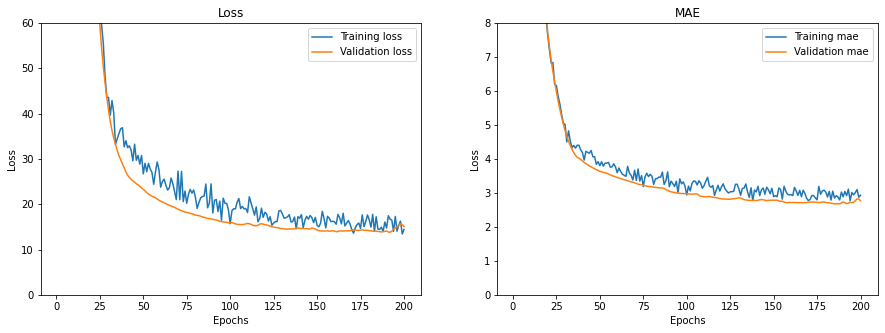

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
mae      = history.history['mae']
val_mae  = history.history['val_mae']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,60)
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, mae, label='Training mae')
plt.plot(epochs, val_mae, label='Validation mae')
plt.title('MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,8)
plt.legend()

## 5.이진분류 - IMDB
- 영화 리뷰 - 긍정/부정

### 5-01. Binary Cross Entropy
* $\displaystyle cost(W) = \frac{1}{m}\sum err(H(x), y)$
    * $ err(H(x), y) = 
  \begin{cases}
    y\cdot-log(H(x)) & \quad\text{if } y=1\\
    (1-y)\cdot-log(1-H(x)) & \quad\text {if } y=0
  \end{cases}$


In [ ]:
* $\displaystyle cost(W) = \frac{1}{m}\sum_{i=1}^m \Big(y \cdot -log(H(x)) + (1-y) \cdot -log(1-H(x))\Big) $
* $\displaystyle cost(W) = -\frac{1}{m}\sum_{i=1}^m \Big(y \cdot log(H(x)) + (1-y) \cdot log(1-H(x))]$

Text(0.5, 1.0, '$-log(1-p), y=0$')

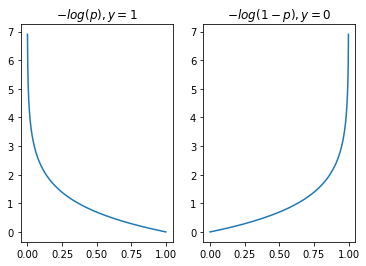

In [ ]:
p = np.arange(0.001, 1, 0.001)

plt.subplot(1,2, 1)
plt.plot(p, -np.log(p))
plt.title("$-log(p), y=1$")
plt.subplot(1,2, 2)
plt.plot(p, -np.log(1-p))
plt.title("$-log(1-p), y=0$")

In [ ]:
mse_r1 = tf.keras.losses.mse([1], [0.9])
mse_r2 = tf.keras.losses.mse([0], [0.1])
mse_w1 = tf.keras.losses.mse([1], [0.1])
mse_w2 = tf.keras.losses.mse([0], [0.9])

print(f'MSE right:{mse_r1.numpy(), mse_r2.numpy()}, wrong:{mse_w1.numpy(), mse_w2.numpy()}')

bce_r1 = tf.keras.losses.binary_crossentropy([1], [0.9])
bce_r2 = tf.keras.losses.binary_crossentropy([0], [0.1])
bce_w1 = tf.keras.losses.binary_crossentropy([1], [0.1])
bce_w2 = tf.keras.losses.binary_crossentropy([0], [0.9])

print(f'binary_cross_entropy right:{bce_r1.numpy(), bce_r2.numpy()}, wrong:{bce_w1.numpy(), bce_w2.numpy()}')

MSE right:(0.010000004, 0.010000001), wrong:(0.80999994, 0.80999994)
binary_cross_entropy right:(0.10536041, 0.10536041), wrong:(2.3025842, 2.302584)


### 5-02. IMDB 데이터 가져오기

In [ ]:
from tensorflow.keras.datasets import imdb

(train_data, y_train), (test_data, y_test) = imdb.load_data(num_words = 10000)
print(train_data.shape, test_data.shape)

17465344/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)


In [ ]:
print(train_data[:2])
print(y_train[:2])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])
decoded_review

1646592/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
import numpy as np

# 10000개의 단어 중에 review sample에서 사용한 단어만 1로 채우기
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test  = vectorize_sequences(test_data)
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

### 5-03. 모델 설계 및 학습

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train,
                   epochs=20, batch_size=512,
                   validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_18 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
40/40 [==============================] - 1s 36ms/step - loss: 0.5196 - accuracy: 0.7842 - val_loss: 0.3632 - val_accuracy: 0.8774
Epoch 2/20
40/40 [==============================] - 1s 28ms/step - loss: 0.2776 - accuracy: 0.9065 - val_loss: 0.2838 - val_accuracy: 0.8914
Epoch 3/20
40/40 [==============================] - 1s 27ms/step - loss: 0.1965 - accuracy: 0.93

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 5-04. 시각화로 과적합 확인

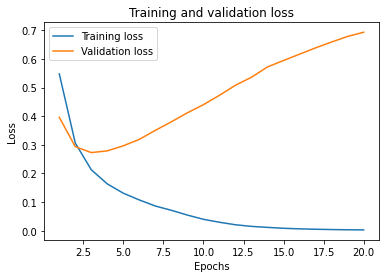

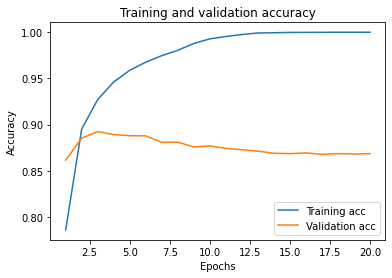

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 5-05. Callback
- 매 batch 마다 호출되는 함수 지정

In [ ]:
import tensorflow as tf
import datetime

# tf.keras.callbacks.Callback를 상속 받아 클래스 생성
class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        print('Training: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

    def on_train_batch_end(self, batch, logs=None):
        print('Training: batch {}   ends at {}'.format(batch, datetime.datetime.now().time()))

    def on_test_batch_begin(self, batch, logs=None):
        print('Evaluating: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

    def on_test_batch_end(self, batch, logs=None):
        print('Evaluating: batch {} ends   at {}'.format(batch, datetime.datetime.now().time()))

cb = MyCustomCallback()
x = np.arange(10)
y = x * 2
    
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(loss='mse')    
model.fit(x,y, callbacks=[cb])
model.evaluate(x,y, callbacks=[cb])

Training: batch 0 begins at 22:53:27.386938
Training: batch 0   ends at 22:53:27.692274
1/1 [==============================] - 0s 1ms/step - loss: 94.6266
Evaluating: batch 0 begins at 22:53:27.734517
Evaluating: batch 0 ends   at 22:53:27.784339
1/1 [==============================] - 0s 2ms/step - loss: 92.7694


92.76936340332031

#### 5-05-1. loss 출력 Epoch 간격 조정 실습


In [ ]:
import tensorflow as tf
import numpy as np

class StepLogCallback(tf.keras.callbacks.Callback):
  def __init__(self, step):
    super(StepLogCallback, self).__init__()
    self.step = step
    
  def on_epoch_end(self, epoch, logs):
    epochs = self.params['epochs']
    loss = logs["loss"]
    if epoch % self.step == 0:      
      print(f'epoch:{epoch}/{epochs}, loss:{loss}')
    if epoch == epochs-1:
      print(f"epoch:{epochs}/{epochs}, loss:{loss}")

x = np.arange(10)
y = x * 2
    
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dense(1)
])
cb = StepLogCallback(500)
model.compile(loss='mse')    
model.fit(x,y, epochs=10000, callbacks=[cb], verbose=0) 

epoch:0/10000, loss:61.40541458129883
epoch:500/10000, loss:0.0005238362355157733
epoch:1000/10000, loss:0.00023916922509670258
epoch:1500/10000, loss:0.00023598995176143944
epoch:2000/10000, loss:0.00023252537357620895
epoch:2500/10000, loss:0.00022843971964903176
epoch:3000/10000, loss:0.0002233985287602991
epoch:3500/10000, loss:0.00021630122500937432
epoch:4000/10000, loss:0.00020557436801027507
epoch:4500/10000, loss:0.00020562853023875505
epoch:5000/10000, loss:0.00020560206030495465
epoch:5500/10000, loss:0.00020570284686982632
epoch:6000/10000, loss:0.00020574717200361192
epoch:6500/10000, loss:0.00020569931075442582
epoch:7000/10000, loss:0.00020567172032315284
epoch:7500/10000, loss:0.00020562965073622763
epoch:8000/10000, loss:0.0002055933728115633
epoch:8500/10000, loss:0.00020559814583975822
epoch:9000/10000, loss:0.00020565003796946257
epoch:9500/10000, loss:0.00020561895507853478
epoch:10000/10000, loss:0.00020637763373088092


#### 5-05-2. EarlyStopping Callback 적용

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
             metrics=['accuracy'])
cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
model.fit(X_train, y_train, epochs=20, batch_size=512, callbacks=[cb],  validation_split=0.2)
results = model.evaluate(X_test, y_test)

Epoch 1/20
40/40 [==============================] - 2s 51ms/step - loss: 0.4593 - accuracy: 0.7939 - val_loss: 0.3135 - val_accuracy: 0.8802
Epoch 2/20
40/40 [==============================] - 2s 45ms/step - loss: 0.2435 - accuracy: 0.9069 - val_loss: 0.2768 - val_accuracy: 0.8940
Epoch 3/20
40/40 [==============================] - 2s 46ms/step - loss: 0.1911 - accuracy: 0.9298 - val_loss: 0.3892 - val_accuracy: 0.8558
Epoch 4/20
782/782 [==============================] - 2s 2ms/step - loss: 0.3188 - accuracy: 0.8779


## 6.다항 분류 -  MNIST 손글씨


### 6-01. Softmax 함수
* 다항 로지스틱 회귀
  * 여러 클래스에 대한 각각의 $H(x)$를 확률로 변형 필요
  * Sigmoid 대신 Softmax 함수 사용
* Softmax
  * $\displaystyle P(z) = \frac{e^{z_i}}{e^{z_0} + e^{z_1} + e^{z_2}... + e^{z_k}}= \frac{e^{z_i}}{\sum_{k=1}^ke^{z_k}} (for \, i=1,2,...,K)$
    * 확율
    * 각 클래스의 출력을 0~1 사이의 값으로 변환, * 모든 클래스의 값의 합은 1
* Tensorflow API
    * `tf.nn.softmax(logits)`
        * types : float16(half), float32, float64
    * `tf.keras.activations.softmax(logits)`

In [ ]:
import numpy as np

logits = np.array([[2,1,3]], dtype=np.float32)
print("logits", logits)

p = np.exp(logits) / np.sum(np.exp(logits))
print("probability:", p, "sum:", np.sum(p))

logits [[2. 1. 3.]]
probability: [[0.24472848 0.09003057 0.66524094]] sum: 1.0


In [ ]:
import tensorflow as tf

logits = np.array([[2,1,3]], dtype=np.float32)
print("logits", logits)

p = tf.nn.softmax(logits)
print("probability:", p.numpy(), "sum:", tf.reduce_sum(p).numpy())

p2 = tf.keras.activations.softmax(tf.convert_to_tensor(logits))
print("probability:", p2.numpy(), "sum:", tf.reduce_sum(p2).numpy())

logits [[2. 1. 3.]]
probability: [[0.24472848 0.09003057 0.66524094]] sum: 1.0
probability: [[0.24472848 0.09003057 0.66524094]] sum: 1.0


### 6-02. Cross Entropy Cost
* Softmax의 비용함수 
  * $\displaystyle Cost(W) =  -\frac{1}{m}\sum_{i=1}^m y \cdot log(p) = \frac{1}{m}\sum_{i=1}^m -y \cdot log(p)$
  * Binary Cross Entropy의  $y=1$ 경우를 모두 합한 형태
* Cross Entropy cost 함수 원리
    * 소프트맥스를 통과한 결과값 $p$는 어떤 특정한 클래스만 큰 값을 갖고 나머지는 아주 작은 값을 갖는다.
    * One-hot encoding 된 $y$는 정답 클래스인 경우만 1을 나머지는 0을 가지고 있다.
    * $p$와 $y$를 곱하면 정답만 남고 나머지는 0으로 사라진다.
    * $-log(p)$함수를 적용하면 0에 가까운 값은 매우 커지고 1에 가까운 값은 0에 가까워 진다.
    * 따라서 $y\cdot -log(p)$는 정답과 틀리면 매우 큰 값을 갖고 정답에 맞으면 0에 가까운 값이 나오므로 비용함수로 적합하다.

*  Tensorflow API
  * `tf.nn.softmax_cross_entropy_with_logits(labels, logits)`
      *  `labels` :one-hot encoded label
      * `logits` : softmax 하기 전 출력 값(내부적으로 softmax 처리)
  * `tf.keras.losses.categorical_crossentropy(y_true, y_pred)`
      * `y_true` : one-hot encoded label
      * `y_pred` : predted probability
  * `tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)`
      * `y_true` : non one-hot encoded label(class vector)
      * `y_pred` : predted probability    

In [ ]:
import tensorflow as tf
y = tf.constant([[0,1,0]], dtype=tf.float32)
t_logit = tf.constant([[5, 2, 1]], dtype=tf.float32)
f_logit = tf.constant([[1, 5, 2]], dtype=tf.float32)

fp = tf.keras.activations.softmax(t_logit)
tp = tf.keras.activations.softmax(f_logit)
print(f'y\t {y}')
print(f'p\t wrong:{fp},\t right:{tp}')


tf_fc = tf.keras.losses.categorical_crossentropy(y, fp)
tf_tc = tf.keras.losses.categorical_crossentropy(y, tp)
print(f'cost\t wrong:{tf_fc},\t right:{tf_tc}')

y_label = tf.convert_to_tensor([1]) #[0,1,0]
tf_fc1 = tf.keras.losses.sparse_categorical_crossentropy(y_label, fp )
tf_tc1 = tf.keras.losses.sparse_categorical_crossentropy(y_label, tp)
print(f'cost\t wrong:{tf_fc1},\t right:{tf_tc1}')

y	 [[0. 1. 0.]]
p	 wrong:[[0.93623954 0.04661262 0.01714783]],	 right:[[0.01714783 0.93623954 0.04661262]]
cost	 wrong:[3.0658839],	 right:[0.06588391]
cost	 wrong:[3.0658839],	 right:[0.06588391]


### 6-03. Data loading


11493376/11490434 [==============================] - 0s 0us/step
<class 'tuple'> 2
(60000, 28, 28) (10000,)
(10000, 28, 28) (10000,)
[5 0 4 1 9]


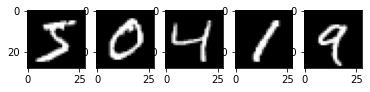

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist.load_data()
print(type(mnist), len(mnist))

(X_train, y_train), (X_test, y_test) = mnist
print(X_train.shape, y_test.shape)
print(X_test.shape, y_test.shape)

print(y_train[:5])
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i], cmap="gray")


### 6-04. Data preprocessing
* 정규화(Normalization)
    * 픽셀 데이타 : 0 ~ 255
    * 정규화 데이타 : 0 ~ 1  
* 2차원 이미지를 1차원으로 변경
    * (28,28)
    * (784)

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
(X_train, X_test) = (np.float32(X_train)/255, np.float32(X_test)/255)

n_input = 28*28
(X_train, X_test) = (X_train.reshape(-1, n_input), X_test.reshape(-1, n_input))

### 6-05. Neural Net 설계
* 입력 : 28*28
* layer1 : 300
* layer2 : 100
* 출력 : 10

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(28*28,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')])
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=10,
                    validation_split=0.2)

test_scores = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_33 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
480/480 [==============================] - 3s 6ms/step - loss: 0.4012 - accuracy: 0.8803 - val_loss: 0.1500 - val_accuracy: 0.9558
Epoch 2/10
480/480 [==============================] - 3s 6ms/step - loss: 0.1616 - accuracy: 0.9542 - v

### 6-06. 직접 쓴 숫자 prediction
* 손으로 쓴 숫자 
  * 온라인 그림판 : https://sketch.io/sketchpad/
  * 샘플 숫자 이미지 다운로드 :  0458.png

In [ ]:
!wget -N --http-user=mysuni --http-passwd=mysuni1!  http://sk.jaen.kr:8080/0458.png

*  img2data 모듈 download

In [ ]:
!wget -O img2data.py http://sk.jaen.kr/download?download_path=%2Fdata%2Ffiles%2FmySUNI%2F06.Image%2Fimg2data.py

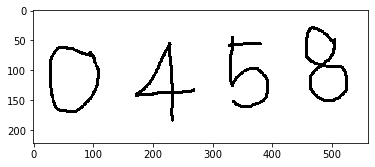

[[9.8817492e-01 1.6209874e-06 9.9072075e-03 7.1681308e-04 1.4652636e-05
  1.4940080e-05 2.0343365e-05 1.1697479e-04 9.0064214e-07 1.0316544e-03]] [0]
[[5.0466191e-05 4.4826546e-04 3.5165090e-03 1.0515474e-05 9.9301320e-01
  1.9799753e-04 1.4564622e-03 1.0353056e-03 7.0611495e-06 2.6413737e-04]] [4]
[[3.1926036e-03 3.0947285e-04 6.4370607e-04 5.7561947e-03 5.7202438e-04
  8.2061297e-01 1.2099824e-02 3.6135697e-04 1.0018111e-01 5.6270730e-02]] [5]
[[4.2500912e-04 8.9232618e-04 2.6839292e-03 2.2629904e-02 1.5245330e-04
  3.2002840e-03 6.1846361e-04 1.0983438e-04 9.6407276e-01 5.2150162e-03]] [8]


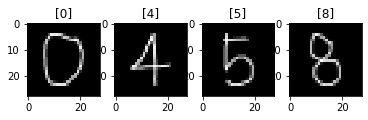

In [ ]:
import numpy as np
import cv2
import img2data

img_path = '0458.png'

image = cv2.imread(img_path)
plt.imshow(image)
plt.show()

numbers = img2data.img2digits(image, (28,28), border=4)
for i, n in enumerate(numbers):
    pred = model.predict(n.astype(np.float32)/255.0)
    pred_label = np.argmax(pred, axis=1)
    print(pred, pred_label)
    plt.subplot(1, len(numbers), i+1)
    plt.title(str(pred_label))
    plt.imshow(n.reshape(28,28), cmap="gray")